In [1]:
from PIL import Image
import numpy as np

In [2]:
local_image = "sample_pie.png"

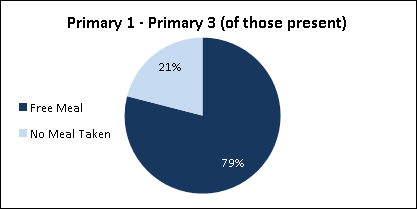

In [3]:
Image.open(local_image)

In [4]:
img = Image.open(local_image).convert("RGB")
img = np.array(img)
size = img.shape
# encoded_string = base64.b64encode(img)

In [5]:
# re_img = np.fromstring(encoded_string)
# re_img = np.resize(re_img, size)
# re_img.shape

In [6]:
import requests
import json

In [7]:
url = 'http://49.50.175.108:6010/items/'
req = {
    "instances" : img.tolist() # [H, W, C]
}

response = requests.post(
    url=url,
    data=json.dumps(req)
)

In [8]:
res_eval = eval(response.text)
res_eval

{'im_shape': [209, 417, 3],
 'dgr': [284.13968507075475, 75.86031492924523],
 'grp': [[[202.39407348632812, 115.20999145507812],
   [126.49090576171875, 95.67401885986328],
   [202.7940216064453, 37.22562789916992],
   0.7475330432256063],
  [[202.39407348632812, 115.20999145507812],
   [202.7940216064453, 37.22562789916992],
   [126.49090576171875, 95.67401885986328],
   0.7475330432256063]]}

In [9]:
284.13968507075475/360

0.7892769029743187

In [10]:
for g in res_eval["grp"]:
    print("="*50)
    for x, y in g[:-1]:
        print(f"x : {x}, y : {y}")

x : 202.39407348632812, y : 115.20999145507812
x : 126.49090576171875, y : 95.67401885986328
x : 202.7940216064453, y : 37.22562789916992
x : 202.39407348632812, y : 115.20999145507812
x : 202.7940216064453, y : 37.22562789916992
x : 126.49090576171875, y : 95.67401885986328


In [19]:
# backend server
url = 'http://sanghyun.ddns.net:8880'
print(
    requests.get(url=url + "/")
)

imag_list = img.tolist()
print(type(imag_list))
req = {
    "item" : imag_list # [H, W, C]
}
response = requests.post(
    url=url + "/items",
    data=json.dumps(req)
)
response

<Response [200]>
<class 'list'>


<Response [422]>

In [12]:
response

<Response [422]>

In [23]:
198592652 * 32 / 1024/ 1024/ 1024

5.918522238731384